In [176]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 12.0)

import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams
import pandas as pd
from Bio import SeqIO
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE


160 14 105


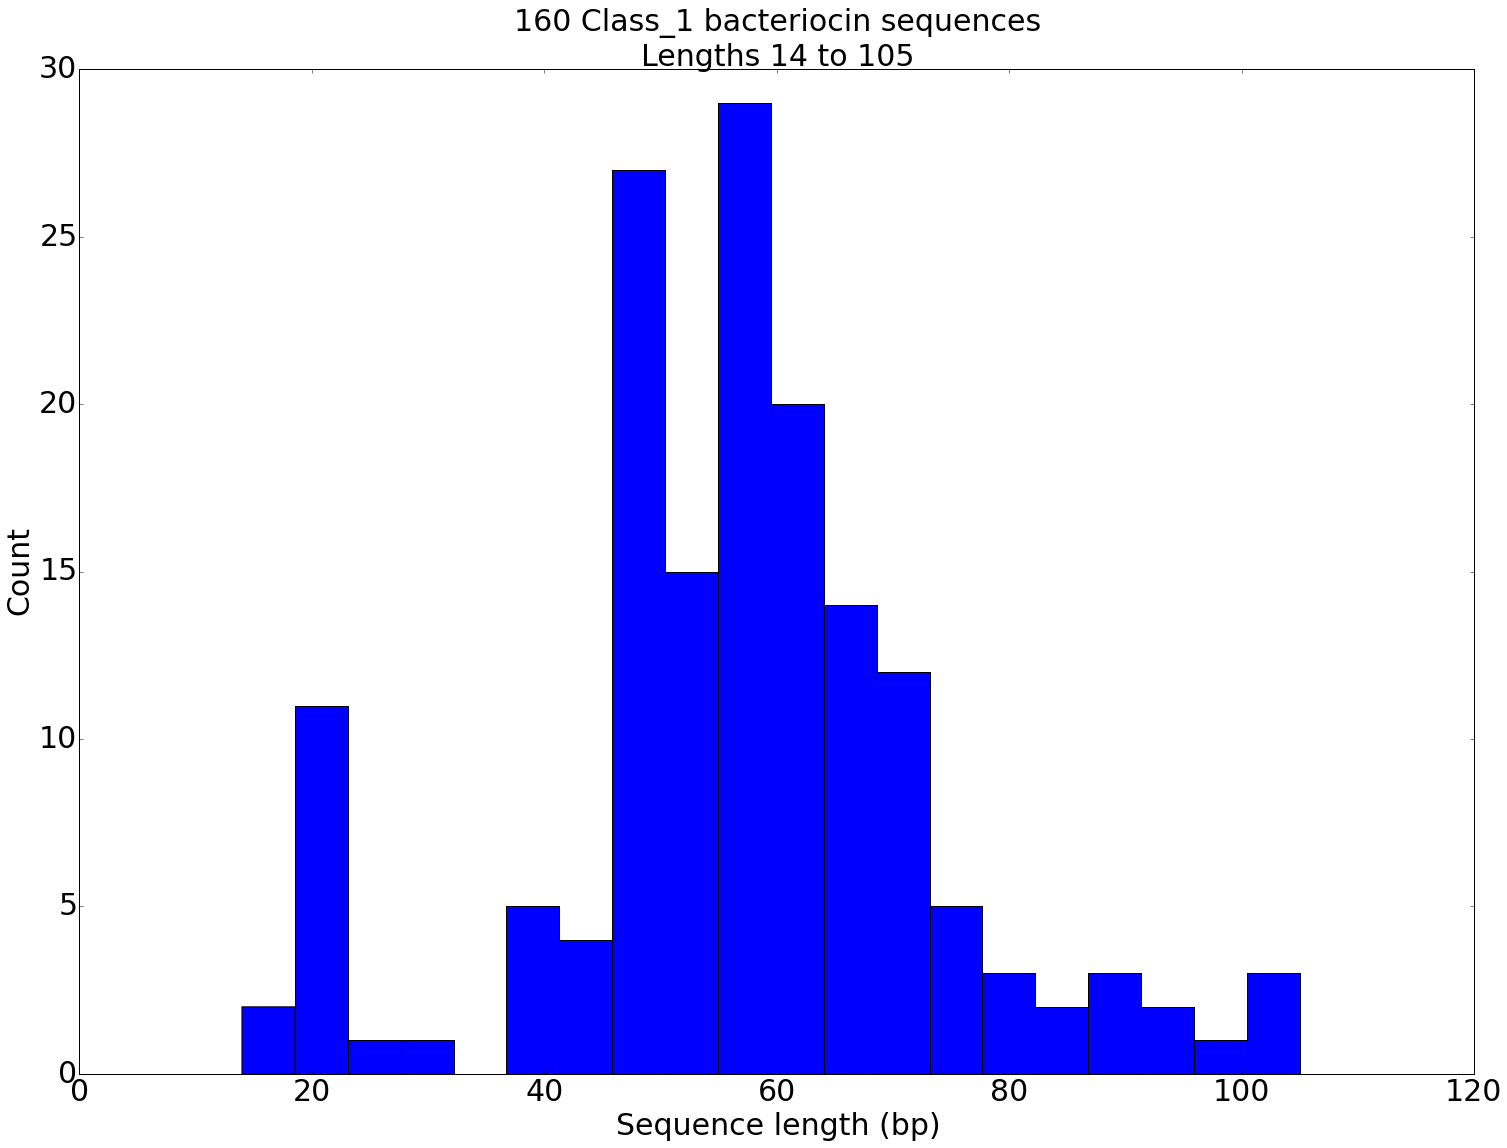

In [6]:
"""
Length distribution of class 1 bacteriocins
"""
from matplotlib import pyplot as plt
%matplotlib inline
from Bio import SeqIO
sizes = [len(rec) for rec in SeqIO.parse("class_1_protein.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

width = 25
height = 18
plt.figure(figsize=(width, height))

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize = 30)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    labelsize = 30)
plt.hist(sizes, bins=20)
plt.title("%i Class_1 bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)), size = 30)
plt.xlabel("Sequence length (bp)", size = 30)
plt.ylabel("Count", size = 30)

plt.show()

229 7 255


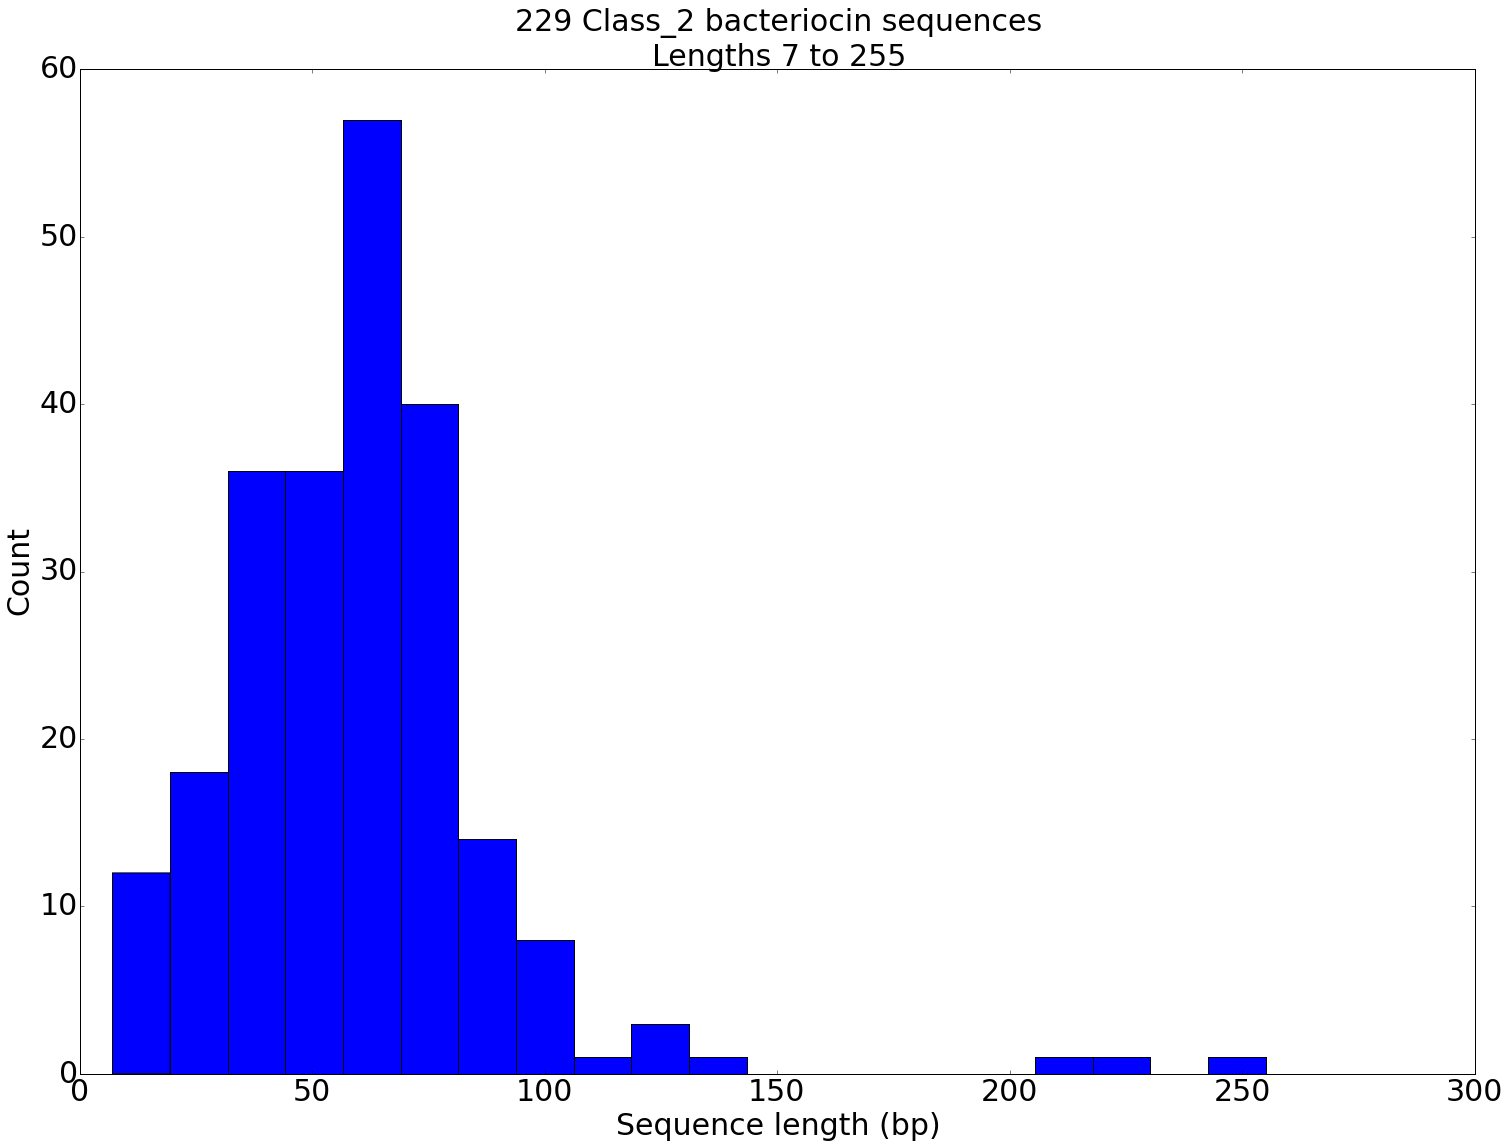

In [7]:
"""
Length distribution of class 2 bacteriocins
"""
from matplotlib import pyplot as plt
%matplotlib inline
from Bio import SeqIO
sizes = [len(rec) for rec in SeqIO.parse("class_2_protein.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

width = 25
height = 18
plt.figure(figsize=(width, height))

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize = 30)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    labelsize = 30)
plt.hist(sizes, bins=20)
plt.title("%i Class_2 bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)), size = 30)
plt.xlabel("Sequence length (bp)", size = 30)
plt.ylabel("Count", size = 30)

plt.show()

389 7 255


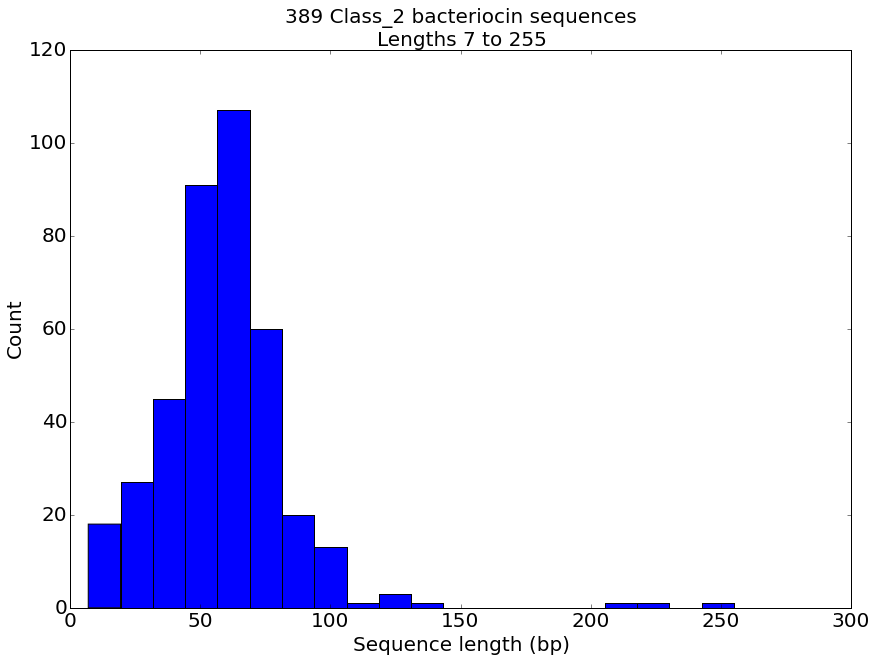

In [10]:
"""
Length distribution of class 2 bacteriocins
"""
from matplotlib import pyplot as plt
%matplotlib inline
from Bio import SeqIO
sizes = [len(rec) for rec in SeqIO.parse("Whole_neg_antiBP2.data", "fasta")]
print len(sizes), min(sizes), max(sizes)

width = 14
height = 10
plt.figure(figsize=(width, height))

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize = 20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    labelsize = 20)
plt.hist(sizes, bins=20)
plt.title("%i Class_2 bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)), size = 20)
plt.xlabel("Sequence length (bp)", size = 20)
plt.ylabel("Count", size = 20)

plt.show()

In [74]:
# Creating a list of all possible bi-grams from protein alphabet

from itertools import permutations
protein_alphabet = "ARNDCEQGHILKMFPSTWYV"
extra_bi_grams = ['AA', 'RR', 'NN', 'DD', 'CC', 'EE', 'QQ','GG', 'HH', 'II', 'LL', 'KK', 'MM', 'FF',
                 'PP', 'SS', 'TT', 'WW', 'YY', 'VV']
#print permutations(protein_alphabet)
all_bi_grams = [item[0]+item[1] for item in permutations(protein_alphabet, 2)] + extra_bi_grams
print sorted(all_bi_grams)
print len(all_bi_grams)

['AA', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AK', 'AL', 'AM', 'AN', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AV', 'AW', 'AY', 'CA', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CV', 'CW', 'CY', 'DA', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DK', 'DL', 'DM', 'DN', 'DP', 'DQ', 'DR', 'DS', 'DT', 'DV', 'DW', 'DY', 'EA', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EK', 'EL', 'EM', 'EN', 'EP', 'EQ', 'ER', 'ES', 'ET', 'EV', 'EW', 'EY', 'FA', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FK', 'FL', 'FM', 'FN', 'FP', 'FQ', 'FR', 'FS', 'FT', 'FV', 'FW', 'FY', 'GA', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GK', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GS', 'GT', 'GV', 'GW', 'GY', 'HA', 'HC', 'HD', 'HE', 'HF', 'HG', 'HH', 'HI', 'HK', 'HL', 'HM', 'HN', 'HP', 'HQ', 'HR', 'HS', 'HT', 'HV', 'HW', 'HY', 'IA', 'IC', 'ID', 'IE', 'IF', 'IG', 'IH', 'II', 'IK', 'IL', 'IM', 'IN', 'IP', 'IQ', 'IR', 'IS', 'IT', 'IV', 'IW', 'IY', 'KA', 'KC', 'KD', 'KE', 'KF', 'KG', 'KH

In [78]:
"""
Building bi-grams from all class 1 sequences and putting them into a csv file
"""
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams


# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
bi_dic = defaultdict(int)

out_handle = open("class_1_bi_grams", "w")
for rec in SeqIO.parse("class_1_protein.fa", "fasta"):
    bi_tokens = bigrams(rec.seq)
    
    # bi_tokens is a generator - you can only go through it once
    for item in ((bi_tokens)):
        bi_str = item[0] + item[1]
        #print bi_str
        bi_dic[bi_str] += 1
        
    for index, item in enumerate(sorted(all_bi_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % bi_dic[item])
    out_handle.write("\n")
    bi_dic.update({}.fromkeys(bi_dic, 0)) # setting all key values to be zero again
    
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [79]:
"""
Building bi-grams from all class 2 sequences and putting them into a csv file
"""

import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams

# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
bi_dic = defaultdict(int)

out_handle = open("class_2_bi_grams", "w")
for rec in SeqIO.parse("class_2_protein.fa", "fasta"):
    bi_tokens = bigrams(rec.seq)
    
    # bi_tokens is a generator - you can only go through it once
    for item in ((bi_tokens)):
        bi_str = item[0] + item[1]
        #print bi_str
        bi_dic[bi_str] += 1
        
    for index, item in enumerate(sorted(all_bi_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % bi_dic[item])
    out_handle.write("\n")
    bi_dic.update({}.fromkeys(bi_dic, 0)) # setting all key values to be zero again
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [80]:
# Loading the data into pandas dataframe
import pandas as pd
class_1_data = pd.read_csv("class_1_bi_grams", names=sorted(all_bi_grams))
print class_1_data.shape
class_2_data = pd.read_csv("class_2_bi_grams", names=sorted(all_bi_grams))
print class_2_data.shape

(160, 400)
(229, 400)


In [82]:
print class_2_data.tail(10)

     AA  AC  AD  AE  AF  AG  AH  AI  AK  AL ...  YM  YN  YP  YQ  YR  YS  YT  \
219   0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
220   1   0   0   0   2   0   0   0   1   1 ...   0   0   0   1   0   0   0   
221   1   0   0   1   2   0   0   0   0   1 ...   0   0   0   1   0   0   0   
222   0   0   0   0   1   0   0   1   0   0 ...   0   0   0   1   0   0   0   
223   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
224   0   0   0   0   0   2   0   0   0   0 ...   0   0   0   0   0   0   0   
225   1   0   0   0   0   0   0   0   1   1 ...   0   0   0   0   0   0   1   
226   0   0   0   0   0   0   0   0   0   0 ...   0   2   0   0   0   0   0   
227   3   0   0   0   1   1   0   0   0   2 ...   0   0   0   0   0   0   0   
228   1   0   0   0   0   0   0   0   0   1 ...   0   0   0   0   0   0   0   

     YV  YW  YY  
219   0   0   0  
220   0   0   0  
221   0   0   0  
222   1   0   0  
223   0   0   0  
224   0   0   0  
225 

In [233]:
# take pandas values into numpy and merge 2 classes

import numpy as np
array1 = class_1_data.values
#print array
array2 = class_2_data.values
total_array = np.vstack((array1, array2))
print total_array.shape
print total_array

(389, 400)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]


In [165]:
# deleting columns with all zero values, then normalizing the data
# from sklearn.preprocessing import Normalizer
# total_array_trimmed = total_array[:, ~np.all(total_array == 0, axis=0)]
# print total_array_trimmed.shape

# scaler = Normalizer().fit(total_array_trimmed)
# normalizedData = scaler.transform(total_array_trimmed.astype(float))
# print (normalizedData[0, :])

(389, 400)
[ 0.12126781  0.          0.          0.          0.          0.12126781
  0.          0.24253563  0.          0.          0.12126781  0.12126781
  0.          0.          0.          0.          0.          0.12126781
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.12126781  0.          0.          0.          0.12126781  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.12126781  0.          0.
  0.          0.          0.          0.          0.          0.
  0.12126781  0.          0.12126781  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        

In [ ]:
norm1 = normalize(total_array_trimmed.astype(float), norm = 'l1', axis = 1)

6.33527240929


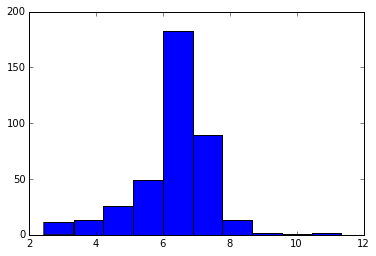

In [193]:
print np.mean(np.sum(normalizedData, axis = 1))
plt.hist(np.sum(normalizedData, axis = 1))
plt.show()

### Standardizing data is a bad idea, gave really bad results
training error: 145 / 300
test error: 82 / 89

In [161]:
# Standardize data (0 mean, 1 stdev) - Avoid this step in future
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(total_array_trimmed)
rescaledDat = scaler.transform(total_array_trimmed)

print rescaledDat[110, :]

[ 0.10902628 -0.40523817  2.52892018 -0.36946423 -0.39351323 -0.79534884
 -0.24574381 -0.68913492 -0.51011402 -0.54685458 -0.29126931 -0.49178213
 -0.35241628 -0.27225024 -0.31820255 -0.61839839 -0.66017744  0.71642167
 -0.37645594  2.10849412 -0.39109208 -0.3464133  -0.17841031 -0.15656876
 -0.2328101  -0.4342395  -0.22660837 -0.33069841 -0.30642413 -0.34324349
 -0.20711215 -0.49695211 -0.25723669 -0.17058877 -0.20711215 -0.45686974
 -0.43390095 -0.33425147 -0.31443609 -0.11410887 -0.37184369 -0.27850014
 -0.2985619  -0.32499268 -0.33425147 -0.29496185 -0.17841031 -0.36198501
 -0.30999945 -0.45320605 -0.20845847 -0.24218258 -0.24574381 -0.24483771
  4.41420609 -0.29939248 -0.28318808  1.75875917 -0.33069841 -0.19321836
 -0.40265266 -0.31934778 -0.23785085 -0.41495919 -0.2328101  -0.38275047
 -0.10818277 -0.41452842  1.62087811 -0.69021656  2.63415556 -0.37975314
 -0.2002672  -0.28088381 -0.20711215  2.34409067 -0.39082969 -0.37535805
 -0.16480159 -0.14490471 -0.37377724 -0.20801051 -0

/home/nafizh/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


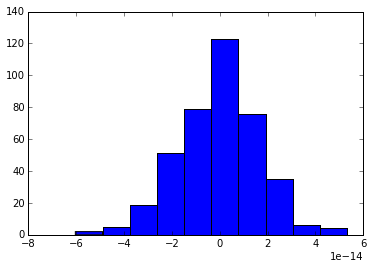

In [158]:
plt.hist(np.sum(rescaledDat, axis = 0))
plt.show()

In [243]:
# Splitting data into training and test set 
np.random.shuffle(norm1)
training, test = norm1[:300,:], norm1[300:,:]
print training.shape
print test.shape

(300, 400)
(89, 400)


In [244]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data

X_train = training
# Generate some regular novel observations

X_test = test

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


# # plot the line, the points, and the nearest vectors to the plane
# #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# #Z = Z.reshape(xx.shape)

# plt.title("Novelty Detection")
# #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
# #a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# #plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')

# plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/300 ; errors novel regular: %d/89 ; "
#     % (n_error_train, n_error_test))
# plt.show()

print "training error:", n_error_train, "/", training.shape[0] 
print "test error:", n_error_test, "/", test.shape[0]
print "training accuracy", (float(training.shape[0] - n_error_train) / training.shape[0]) * 100, "%"
print "test accuracy", (float(test.shape[0] - n_error_test) / test.shape[0]) * 100, "%"

training error: 29 / 300
test error: 7 / 89
training accuracy 90.3333333333 %
test accuracy 92.1348314607 %


# Only class 1 data
Applying SVM one class to only class 1 data, and see how it works.

In [152]:
# deleting columns with all 0 values - only class 2, normalizing that data
class1_array_trimmed = array1[:, ~np.all(array1 == 0, axis=0)]
print class1_array_trimmed.shape

scaler = Normalizer().fit(class1_array_trimmed)
normalizedcls1 = scaler.transform(class1_array_trimmed.astype(float))
print np.sum(normalizedcls1[0, :])

(160, 393)
6.53197264742


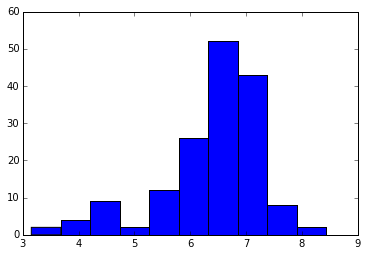

In [151]:
# Visualizing in a histogram of the distribution of the normalized data - sum of each row
plt.hist(np.sum(normalizedcls1, axis = 1))
plt.show()

In [153]:
# Splitting data into training and test set - just class_1
np.random.shuffle(normalizedcls1)
cls1_training, cls1_test = normalizedcls1[:100,:], normalizedcls1[100:,:]
print cls1_training.shape
print cls1_test.shape

(100, 393)
(60, 393)


In [172]:
# Trying out svm one class learning on class_2 data
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data

X_train = cls1_training
# Generate some regular novel observations

X_test = cls1_test

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


# # plot the line, the points, and the nearest vectors to the plane
# #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# #Z = Z.reshape(xx.shape)

# plt.title("Novelty Detection")
# #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
# #a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# #plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')

# plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/300 ; errors novel regular: %d/89 ; "
#     % (n_error_train, n_error_test))
# plt.show()

print "training error:", n_error_train, "/", cls1_training.shape[0] 
print "test error:", n_error_test, "/", cls1_test.shape[0]
print "training accuracy", (float(cls1_training.shape[0] - n_error_train) / cls1_training.shape[0]) * 100, "%"
print "test accuracy", (float(cls1_test.shape[0] - n_error_test) / cls1_test.shape[0]) * 100, "%" 

training error: 26 / 100
test error: 23 / 60
training accuracy 74.0 %
test accuracy 61.6666666667 %


# Only class 2 data
Applying SVM one class to only class 2 data, and see how it works.

In [145]:
# deleting columns with all 0 values - only class 2, normalizing that data
class2_array_trimmed = array2[:, ~np.all(array2 == 0, axis=0)]
print class2_array_trimmed.shape

scaler = Normalizer().fit(class2_array_trimmed)
normalizedcls2 = scaler.transform(class2_array_trimmed.astype(float))
print np.sum(normalizedcls2[10, :])

(229, 400)
8.54294448375


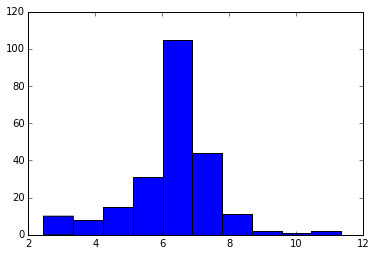

In [146]:
# Visualizing in a histogram of the distribution of the normalized data - sum of each row
plt.hist(np.sum(normalizedcls2, axis = 1))
plt.show()

In [147]:
# Splitting data into training and test set - just class_2
np.random.shuffle(normalizedcls2)
cls2_training, cls2_test = normalizedcls2[:170,:], normalizedcls2[170:,:]
print cls2_training.shape
print cls2_test.shape

(170, 400)
(59, 400)


In [173]:
# Trying out svm one class learning on class_2 data
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data

X_train = cls2_training
# Generate some regular novel observations

X_test = cls2_test

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


# # plot the line, the points, and the nearest vectors to the plane
# #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# #Z = Z.reshape(xx.shape)

# plt.title("Novelty Detection")
# #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
# #a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# #plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')

# plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/300 ; errors novel regular: %d/89 ; "
#     % (n_error_train, n_error_test))
# plt.show()

print "training error:", n_error_train, "/", cls2_training.shape[0] 
print "test error:", n_error_test, "/", cls2_test.shape[0]
print "training accuracy", (float(cls2_training.shape[0] - n_error_train) / cls2_training.shape[0]) * 100, "%"
print "test accuracy", (float(cls2_test.shape[0] - n_error_test) / cls2_test.shape[0]) * 100, "%" 

training error: 27 / 170
test error: 17 / 59
training accuracy 84.1176470588 %
test accuracy 71.186440678 %


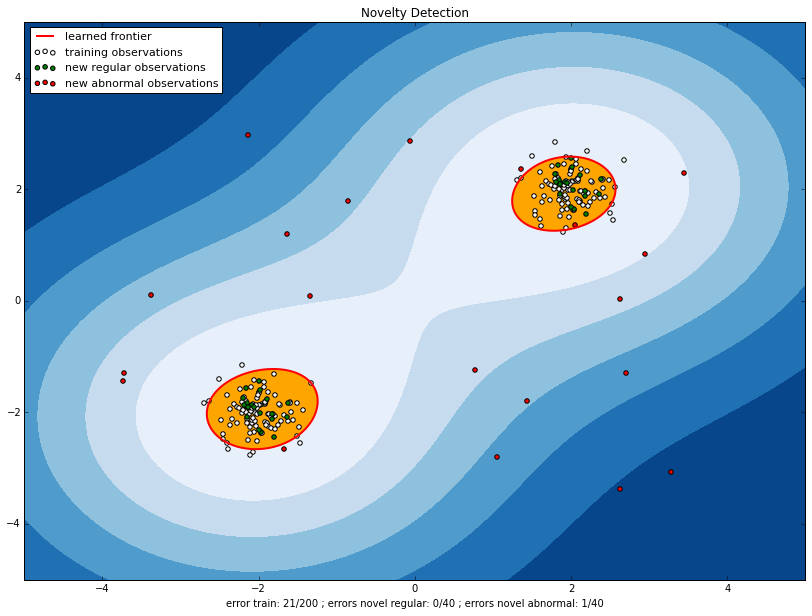

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

width = 14
height = 10
plt.figure(figsize=(width, height))


xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [289]:
print X_train
print X_test
print X_outliers

[[ 1.94313095  1.64939988]
 [ 2.04908805  2.14788223]
 [ 2.24606115  1.77738518]
 [ 1.83623568  2.20274805]
 [ 1.6798362   2.14205715]
 [ 1.54101703  1.60506833]
 [ 2.37486834  1.83943797]
 [ 1.93059962  1.29623987]
 [ 1.6332055   1.76788709]
 [ 2.52319531  1.72977649]
 [ 2.02606258  1.63346371]
 [ 1.36183153  2.19888622]
 [ 2.56804085  2.03747748]
 [ 2.00085075  2.36289367]
 [ 1.97884123  2.11007719]
 [ 1.89226147  1.23648446]
 [ 2.08831015  2.18139458]
 [ 2.11607095  1.96842482]
 [ 1.72175625  2.08888659]
 [ 2.28957891  1.84775063]
 [ 1.86662722  2.10913224]
 [ 1.59725002  1.45790701]
 [ 1.30546009  2.17319635]
 [ 1.80797521  2.28112693]
 [ 1.96566302  1.75972832]
 [ 1.85769019  1.8848221 ]
 [ 2.21639232  1.9288559 ]
 [ 2.11081544  1.78980033]
 [ 2.20747044  2.31759736]
 [ 1.76265826  2.41118046]
 [ 2.01552029  2.14065799]
 [ 1.87099649  2.08890967]
 [ 2.06839738  2.54812099]
 [ 1.89056437  1.73281429]
 [ 2.0858426   2.14698074]
 [ 1.74406269  2.08000322]
 [ 2.07773354  2.16129255]
 

In [290]:
print y_pred_train
print y_pred_test
print y_pred_outliers

[ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]
[-1. -1. -1. -1. -1. -1

In [77]:
hello = {'a' : 1, 'b' : 5, 'c' : 6}
hello.update({}.fromkeys(hello, 0))
print hello

{'a': 0, 'c': 0, 'b': 0}


In [109]:
temp = np.array([[1,1,1,1,1,0,0],
                  [1,1,1,0,1,0,0],
                  [1,1,1,1,1,0,0],
                  [1,0,1,1,0,0,0],
                  [1,1,1,0,1,0,0],
                  [1,1,1,1,1,0,0]])
print temp.shape
print temp
print temp[:, ~np.all(temp == 0, axis=0)] # axis = 0 means column
#print temp2.shape
#print temp2


(6, 7)
[[1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0]
 [1 1 1 1 1 0 0]
 [1 0 1 1 0 0 0]
 [1 1 1 0 1 0 0]
 [1 1 1 1 1 0 0]]
[[1 1 1 1 1]
 [1 1 1 0 1]
 [1 1 1 1 1]
 [1 0 1 1 0]
 [1 1 1 0 1]
 [1 1 1 1 1]]


## Checking the model on predicted gene blocks sequences
Preparing the n-grams first from the sequences, and normalizing the data

In [249]:
"""
Building bi-grams from all predicted gene blocks sequences from BOA done by jamie 
and putting them into a csv file
"""
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams


# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
bi_dic = defaultdict(int)

out_handle = open("predicted_gene_blocks_bi_grams", "w")
for rec in SeqIO.parse("seqs_for_testing.fa", "fasta"):
    bi_tokens = bigrams(rec.seq)
    
    # bi_tokens is a generator - you can only go through it once
    for item in ((bi_tokens)):
        bi_str = item[0] + item[1]
        #print bi_str
        bi_dic[bi_str] += 1
        
    for index, item in enumerate(sorted(all_bi_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % bi_dic[item])
    out_handle.write("\n")
    bi_dic.update({}.fromkeys(bi_dic, 0)) # setting all key values to be zero again
    
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [250]:
# Loading the data into pandas dataframe
import pandas as pd
predicted_gene_data = pd.read_csv("predicted_gene_blocks_bi_grams", names=sorted(all_bi_grams))

# taking the values from panda into numpy array
predarray = predicted_gene_data.values
print predarray.shape
print predarray

(65, 400)
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [2 0 0 ..., 1 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]


In [251]:
# deleting columns with all zero values, then normalizing the data
from sklearn.preprocessing import Normalizer
predarray_trimmed = predarray[:, ~np.all(predarray == 0, axis=0)] # remove columns with all zeros
print predarray_trimmed.shape

# scaler = Normalizer().fit(predarray_trimmed)
# predarrayData = scaler.transform(predarray.astype(float))
# print np.sum(predarrayData[:, 0])

(65, 400)


In [252]:
prednewnorm = normalize(predarray_trimmed.astype(float), norm = 'l1', axis = 1)
print np.sum(prednewnorm, axis = 1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


(572, 400)
11.1875729839


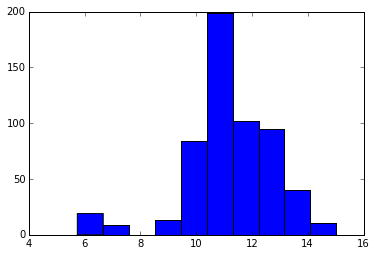

In [208]:
print predarrayData.shape
print np.mean(np.sum(predarrayData, axis = 1))
plt.hist(np.sum(predarrayData, axis = 1))
plt.show()

In [386]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


X_train = training
X_test = test
X_outliers = lacnewnorm

# fit the model
clf = svm.OneClassSVM(nu = 0.1, kernel="rbf", gamma = 0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print "training error:", n_error_train, "/", training.shape[0] 
print "test error:", n_error_test, "/", test.shape[0]
print "predicted gene blocks data error:", n_error_outliers, "/", lacnewnorm.shape[0]

print "training accuracy", (float(training.shape[0] - n_error_train) / training.shape[0]) * 100, "%"
print "test accuracy", (float(test.shape[0] - n_error_test) / test.shape[0]) * 100, "%"
print "predicted gene blocks data accuracy", (float(lacnewnorm.shape[0] - n_error_outliers) / lacnewnorm.shape[0]) * 100, "%"

training error: 28 / 300
test error: 7 / 89
predicted gene blocks data error: 41 / 41
training accuracy 90.6666666667 %
test accuracy 92.1348314607 %
predicted gene blocks data accuracy 0.0 %


In [197]:
print y_pred_test

[ 1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.]


In [230]:
from sklearn.preprocessing import normalize
from numpy import linalg as LA
a = np.array([[1, 3, 4, 5, 6],
             [3, 4, 5, 6, 6]])

norm2 = normalize(a.astype(float), norm = 'l1', axis = 1)
print norm2


[[ 0.05263158  0.15789474  0.21052632  0.26315789  0.31578947]
 [ 0.125       0.16666667  0.20833333  0.25        0.25      ]]


In [231]:
print np.sum(norm2, axis = 1)

[ 1.  1.]


In [234]:
norm1 = normalize(total_array_trimmed.astype(float), norm = 'l1', axis = 1)
print np.sum(norm1, axis = 1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [242]:
print np.sum(norm1[300, :])

1.0


In [240]:
print total_array_trimmed[300, :]

[2 0 0 0 0 3 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 4 0 1 1 1 1
 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 3 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Lets try with tri grams

In [255]:
a=np.arange(9).reshape((3,3))
print a

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [261]:
np.random.shuffle(a)
print a

[[0 1 2]
 [6 7 8]
 [3 4 5]]


In [11]:
# Creating a list of all possible bi-grams from protein alphabet

from itertools import permutations
protein_alphabet = "ARNDCEQGHILKMFPSTWYV"
extra_tri_grams = ['AAA', 'RRR', 'NNN', 'DDD', 'CCC', 'EEE', 'QQQ','GGG', 'HHH', 'III', 'LLL', 'KKK', 'MMM', 'FFF',
                 'PPP', 'SSS', 'TTT', 'WWW', 'YYY', 'VVV']
#print permutations(protein_alphabet)
all_tri_grams = [item[0]+item[1]+item[2] for item in permutations(protein_alphabet, 3)] + extra_tri_grams
print sorted(all_tri_grams)
print len(all_tri_grams)

['AAA', 'ACD', 'ACE', 'ACF', 'ACG', 'ACH', 'ACI', 'ACK', 'ACL', 'ACM', 'ACN', 'ACP', 'ACQ', 'ACR', 'ACS', 'ACT', 'ACV', 'ACW', 'ACY', 'ADC', 'ADE', 'ADF', 'ADG', 'ADH', 'ADI', 'ADK', 'ADL', 'ADM', 'ADN', 'ADP', 'ADQ', 'ADR', 'ADS', 'ADT', 'ADV', 'ADW', 'ADY', 'AEC', 'AED', 'AEF', 'AEG', 'AEH', 'AEI', 'AEK', 'AEL', 'AEM', 'AEN', 'AEP', 'AEQ', 'AER', 'AES', 'AET', 'AEV', 'AEW', 'AEY', 'AFC', 'AFD', 'AFE', 'AFG', 'AFH', 'AFI', 'AFK', 'AFL', 'AFM', 'AFN', 'AFP', 'AFQ', 'AFR', 'AFS', 'AFT', 'AFV', 'AFW', 'AFY', 'AGC', 'AGD', 'AGE', 'AGF', 'AGH', 'AGI', 'AGK', 'AGL', 'AGM', 'AGN', 'AGP', 'AGQ', 'AGR', 'AGS', 'AGT', 'AGV', 'AGW', 'AGY', 'AHC', 'AHD', 'AHE', 'AHF', 'AHG', 'AHI', 'AHK', 'AHL', 'AHM', 'AHN', 'AHP', 'AHQ', 'AHR', 'AHS', 'AHT', 'AHV', 'AHW', 'AHY', 'AIC', 'AID', 'AIE', 'AIF', 'AIG', 'AIH', 'AIK', 'AIL', 'AIM', 'AIN', 'AIP', 'AIQ', 'AIR', 'AIS', 'AIT', 'AIV', 'AIW', 'AIY', 'AKC', 'AKD', 'AKE', 'AKF', 'AKG', 'AKH', 'AKI', 'AKL', 'AKM', 'AKN', 'AKP', 'AKQ', 'AKR', 'AKS', 'AKT', 'AKV'

In [17]:
"""
Building tri-grams from all class 1 sequences and putting them into a csv file
"""
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams


# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
tri_dic = defaultdict(int)

out_handle = open("class_1_tri_grams", "w")
for rec in SeqIO.parse("class_1_protein.fa", "fasta"):
    tri_tokens = trigrams(rec.seq)
    
    # tri_tokens is a generator - you can only go through it once
    for item in ((tri_tokens)):
        tri_str = item[0] + item[1] + item[2]
        #print tri_str
        tri_dic[tri_str] += 1
        
    for index, item in enumerate(sorted(all_tri_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % tri_dic[item])
    out_handle.write("\n")
    tri_dic.update({}.fromkeys(tri_dic, 0)) # setting all key values to be zero again
    
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [267]:
for item in trigrams("MTKKNIRPQQVAPVERETISTAKDQSGQVQAQSSVIWGSPVPFAGDDAE"):
    print item

('M', 'T', 'K')
('T', 'K', 'K')
('K', 'K', 'N')
('K', 'N', 'I')
('N', 'I', 'R')
('I', 'R', 'P')
('R', 'P', 'Q')
('P', 'Q', 'Q')
('Q', 'Q', 'V')
('Q', 'V', 'A')
('V', 'A', 'P')
('A', 'P', 'V')
('P', 'V', 'E')
('V', 'E', 'R')
('E', 'R', 'E')
('R', 'E', 'T')
('E', 'T', 'I')
('T', 'I', 'S')
('I', 'S', 'T')
('S', 'T', 'A')
('T', 'A', 'K')
('A', 'K', 'D')
('K', 'D', 'Q')
('D', 'Q', 'S')
('Q', 'S', 'G')
('S', 'G', 'Q')
('G', 'Q', 'V')
('Q', 'V', 'Q')
('V', 'Q', 'A')
('Q', 'A', 'Q')
('A', 'Q', 'S')
('Q', 'S', 'S')
('S', 'S', 'V')
('S', 'V', 'I')
('V', 'I', 'W')
('I', 'W', 'G')
('W', 'G', 'S')
('G', 'S', 'P')
('S', 'P', 'V')
('P', 'V', 'P')
('V', 'P', 'F')
('P', 'F', 'A')
('F', 'A', 'G')
('A', 'G', 'D')
('G', 'D', 'D')
('D', 'D', 'A')
('D', 'A', 'E')


In [18]:
"""
Building tri-grams from all class 2 sequences and putting them into a csv file
"""
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams


# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
tri_dic = defaultdict(int)

out_handle = open("class_2_tri_grams", "w")
for rec in SeqIO.parse("class_2_protein.fa", "fasta"):
    tri_tokens = trigrams(rec.seq)
    
    # tri_tokens is a generator - you can only go through it once
    for item in ((tri_tokens)):
        tri_str = item[0] + item[1] + item[2]
        #print bi_str
        tri_dic[tri_str] += 1
        
    for index, item in enumerate(sorted(all_tri_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % tri_dic[item])
    out_handle.write("\n")
    tri_dic.update({}.fromkeys(tri_dic, 0)) # setting all key values to be zero again
    
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [19]:
# Loading the data into pandas dataframe
import pandas as pd
class_1_data = pd.read_csv("class_1_tri_grams", names=sorted(all_tri_grams))
print class_1_data.shape
class_2_data = pd.read_csv("class_2_tri_grams", names=sorted(all_tri_grams))
print class_2_data.shape

(160, 6860)
(229, 6860)


In [20]:
# take pandas values into numpy and merge 2 classes

import numpy as np
array1 = class_1_data.values
#print array
array2 = class_2_data.values
total_array = np.vstack((array1, array2))
print total_array.shape
print total_array

(389, 6860)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [272]:
# deleting columns with all zero values, then normalizing the data
#from sklearn.preprocessing import Normalizer
total_array_trimmed = total_array[:, ~np.all(total_array == 0, axis=0)]
print total_array_trimmed.shape

(389, 4277)


In [21]:
norm1 = normalize(total_array.astype(float), norm = 'l1', axis = 1)

In [22]:
print np.sum(norm1, axis = 1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [282]:
# Splitting data into training and test set 
np.random.shuffle(norm1)
training, test = norm1[:300,:], norm1[300:,:]
print training.shape
print test.shape

(300, 6860)
(89, 6860)


In [283]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


#xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data

X_train = training
# Generate some regular novel observations

X_test = test

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


# # plot the line, the points, and the nearest vectors to the plane
# #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# #Z = Z.reshape(xx.shape)

# plt.title("Novelty Detection")
# #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
# #a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# #plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')

# plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/300 ; errors novel regular: %d/89 ; "
#     % (n_error_train, n_error_test))
# plt.show()

print "training error:", n_error_train, "/", training.shape[0] 
print "test error:", n_error_test, "/", test.shape[0]
print "training accuracy", (float(training.shape[0] - n_error_train) / training.shape[0]) * 100, "%"
print "test accuracy", (float(test.shape[0] - n_error_test) / test.shape[0]) * 100, "%"

training error: 28 / 300
test error: 7 / 89
training accuracy 90.6666666667 %
test accuracy 92.1348314607 %


In [277]:
"""
Building tri-grams from all class 2 sequences and putting them into a csv file
"""
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams


# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
tri_dic = defaultdict(int)

out_handle = open("predicted_gene_blocks_tri_grams", "w")
for rec in SeqIO.parse("predicted_gene_blocks.fa", "fasta"):
    tri_tokens = trigrams(rec.seq)
    
    # tri_tokens is a generator - you can only go through it once
    for item in ((tri_tokens)):
        tri_str = item[0] + item[1] + item[2]
        #print bi_str
        tri_dic[tri_str] += 1
        
    for index, item in enumerate(sorted(all_tri_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % tri_dic[item])
    out_handle.write("\n")
    tri_dic.update({}.fromkeys(tri_dic, 0)) # setting all key values to be zero again
    
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [278]:
# Loading the data into pandas dataframe
import pandas as pd
predicted_gene_data = pd.read_csv("predicted_gene_blocks_tri_grams", names=sorted(all_tri_grams))

# taking the values from panda into numpy array
predarray = predicted_gene_data.values
print predarray.shape
print predarray

(572, 6860)
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [279]:
# deleting columns with all zero values, then normalizing the data
from sklearn.preprocessing import Normalizer
predarray_trimmed = predarray[:, ~np.all(predarray == 0, axis=0)] # remove columns with all zeros
print predarray_trimmed.shape

# scaler = Normalizer().fit(predarray_trimmed)
# predarrayData = scaler.transform(predarray.astype(float))
# print np.sum(predarrayData[:, 0])

(572, 6423)


In [284]:
prednewnorm = normalize(predarray.astype(float), norm = 'l1', axis = 1)
print np.sum(prednewnorm, axis = 1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [300]:
# Splitting data into training and test set 
np.random.shuffle(prednewnorm)
pred_training, pred_test = prednewnorm[:500,:], prednewnorm[500:,:]
print pred_training.shape
print pred_test.shape

(500, 6860)
(72, 6860)


In [313]:
bagel_verified_seqs = np.vstack((norm1, seqnewnorm))
print bagel_verified_seqs.shape

(454, 6860)


In [152]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
"""
training set: predicted_gene_blocks.fa sequences
outlier set: bagel bacteriocin sequences
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


X_train = seqnewnorm
X_test = lacnewnorm
X_outliers = norm1

# fit the model
clf = svm.OneClassSVM(nu = 0.1, kernel="rbf", gamma = 0.1)
clf.fit(X_train)


y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == 1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print "training error:", n_error_train, "/", seqnewnorm.shape[0] 
print "test error:", n_error_test, "/", lacnewnorm.shape[0]
print "toxin data error:", n_error_outliers, "/", norm1.shape[0]

print "training accuracy", (float(seqnewnorm.shape[0] - n_error_train) / seqnewnorm.shape[0]) * 100, "%"
print "test accuracy", (float(lacnewnorm.shape[0] - n_error_test) / lacnewnorm.shape[0]) * 100, "%"
print "toxin data accuracy", (float(norm1.shape[0] - n_error_outliers) / norm1.shape[0]) * 100, "%"

training error: 5 / 54
test error: 21 / 41
toxin data error: 3 / 389
training accuracy 90.7407407407 %
test accuracy 48.7804878049 %
toxin data accuracy 99.2287917738 %


In [154]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
"""
training set: predicted_gene_blocks.fa sequences
outlier set: bagel bacteriocin sequences
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


X_train = seqnewnorm
X_test = cur_context_norm
X_outliers = norm1

# fit the model
clf = svm.OneClassSVM(nu = 0.1, kernel="rbf", gamma = 0.1)
clf.fit(X_train)


y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print "training error:", n_error_train, "/", seqnewnorm.shape[0] 
print "test error:", n_error_test, "/", cur_context_norm.shape[0]
print "toxin data error:", n_error_outliers, "/", norm1.shape[0]

print "training accuracy", (float(seqnewnorm.shape[0] - n_error_train) / seqnewnorm.shape[0]) * 100, "%"
print "test accuracy", (float(cur_context_norm.shape[0] - n_error_test) / cur_context_norm.shape[0]) * 100, "%"
print "toxin data accuracy", (float(norm1.shape[0] - n_error_outliers) / norm1.shape[0]) * 100, "%"

training error: 5 / 54
test error: 312 / 1240
toxin data error: 3 / 389
training accuracy 90.7407407407 %
test accuracy 74.8387096774 %
toxin data accuracy 99.2287917738 %


In [156]:
#print y_pred_train
print y_pred_test.shape
#print y_pred_outliers

(1240,)


In [295]:
print prednewnorm.shape
print training.shape
print test.shape

(572, 6860)
(300, 6860)
(89, 6860)


In [343]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
"""
training set: bagel bacteriocin sequences
outlier set: predicted_gene_blocks.fa sequences
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


X_train_bac = seqnewnorm
X_test = norm1
X_outliers_gene = prednewnorm

# fit the model
clf1 = svm.OneClassSVM(nu = 0.1, kernel="rbf", gamma = 0.1)
clf1.fit(X_train_bac)
y_pred_train = clf1.predict(X_train_bac)
y_pred_test = clf1.predict(X_test)
y_pred_outliers = clf1.predict(X_outliers_gene)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == 1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size

print "training error:", n_error_train, "/", seqnewnorm.shape[0] 
print "test error:", n_error_test, "/", norm1.shape[0]
print "predicted gene blocks data error:", n_error_outliers, "/", prednewnorm.shape[0]

print "training accuracy", (float(seqnewnorm.shape[0] - n_error_train) / seqnewnorm.shape[0]) * 100, "%"
print "test accuracy", (float(norm1.shape[0] - n_error_test) / norm1.shape[0]) * 100, "%"
print "predicted gene blocks data accuracy", (float(prednewnorm.shape[0] - n_error_outliers) / prednewnorm.shape[0]) * 100, "%"

training error: 5 / 54
test error: 3 / 389
predicted gene blocks data error: 29 / 572
training accuracy 90.7407407407 %
test accuracy 99.2287917738 %
predicted gene blocks data accuracy 94.9300699301 %


In [375]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
"""
training set: bagel bacteriocin sequences
outlier set: predicted_gene_blocks.fa sequences
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


X_train_bac = classify_norm
X_test = lacnewnorm
X_outliers_gene = norm1

# fit the model
clf1 = svm.OneClassSVM(nu = 0.1, kernel="rbf", gamma = 0.1)
clf1.fit(X_train_bac)
y_pred_train = clf1.predict(X_train_bac)
y_pred_test = clf1.predict(X_test)
y_pred_outliers = clf1.predict(X_outliers_gene)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == 1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print "training error:", n_error_train, "/", classify_norm.shape[0] 
print "test error:", n_error_test, "/", lacnewnorm.shape[0]
print "predicted gene blocks data error:", n_error_outliers, "/", norm1.shape[0]

print "training accuracy", (float(classify_norm.shape[0] - n_error_train) / classify_norm.shape[0]) * 100, "%"
print "test accuracy", (float(lacnewnorm.shape[0] - n_error_test) / lacnewnorm.shape[0]) * 100, "%"
print "predicted gene blocks data accuracy", (float(norm1.shape[0] - n_error_outliers) / norm1.shape[0]) * 100, "%"

training error: 1982 / 19503
test error: 22 / 41
predicted gene blocks data error: 3 / 389
training accuracy 89.8374609035 %
test accuracy 46.3414634146 %
predicted gene blocks data accuracy 99.2287917738 %


In [378]:
X_test_seq = seqnewnorm
y_pred_seq = clf1.predict(X_test_seq)
n_error_test = y_pred_seq[y_pred_seq == -1].size
print "test error:", n_error_test, "/", seqnewnorm.shape[0]
print "test accuracy", (float(seqnewnorm.shape[0] - n_error_test) / seqnewnorm.shape[0]) * 100, "%"

test error: 15 / 65
test accuracy 76.9230769231 %


### Detected 11 true toxins and 4 false toxins in the experimentally verified set

In [379]:
for index, rec in enumerate(SeqIO.parse("seqs_for_testing.fa", "fasta")):
    if y_pred_seq[index] == -1:
        print rec.description, y_pred_seq[index]

CAA72922 AS-48D1 protein [Enterococcus faecalis]. -1.0
AAP11958 putative lantibiotic precursor peptide [Bacillus cereus ATCC 14579]. -1.0
EEU81210 predicted protein [Enterococcus faecalis D6]. -1.0
AAP11957 putative lantibiotic precursor peptide [Bacillus cereus ATCC 14579]. -1.0
AAP11959 putative lantibiotic precursor peptide [Bacillus cereus ATCC 14579]. -1.0
EEU81208 conserved hypothetical protein [Enterococcus faecalis D6]. -1.0
ACI61841 Lantibiotic salivaricin A precursor [Streptococcus pyogenes NZ131]. -1.0
AF061787_1 microcin J25 precursor (plasmid) [Escherichia coli]. -1.0
CAA72920 AS-48C1 protein [Enterococcus faecalis]. -1.0
EEU81209 CylR1 [Enterococcus faecalis D6]. -1.0
ADZ63249 nisin precursor NisinA [Lactococcus lactis subsp. lactis CV56]. -1.0
EEU81211 clyLs [Enterococcus faecalis D6]. -1.0
CAA72917 AS-48 protein [Enterococcus faecalis]. -1.0
AAP11956 putative lantibiotic precursor peptide [Bacillus cereus ATCC 14579]. -1.0
ACI60894 Streptolysin S associated protein (Sag

In [307]:
"""
Building tri-grams from all class 2 sequences and putting them into a csv file
"""
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams


# text="""MINRTDCNENSYMI"""
# # split the texts into tokens
# #tokens = nltk.word_tokenize(text)
# #tokens = [token.lower() for token in tokens if len(token) > 1] #same as unigrams
# bi_tokens = bigrams(text)
# tri_tokens = trigrams(tokens)

# print trigrams count
#print bi_tokens
#print [item for item in ((bi_tokens))]
tri_dic = defaultdict(int)

out_handle = open("seqs_for_testing_tri_grams", "w")
for rec in SeqIO.parse("seqs_for_testing.fa", "fasta"):
    tri_tokens = trigrams(rec.seq)
    
    # tri_tokens is a generator - you can only go through it once
    for item in ((tri_tokens)):
        tri_str = item[0] + item[1] + item[2]
        #print bi_str
        tri_dic[tri_str] += 1
        
    for index, item in enumerate(sorted(all_tri_grams)):
        if index > 0:
            out_handle.write(',')
        out_handle.write("%s" % tri_dic[item])
    out_handle.write("\n")
    tri_dic.update({}.fromkeys(tri_dic, 0)) # setting all key values to be zero again
    
    
out_handle.close()
#print bi_dic
print "Done"

Done


In [347]:
"""
building tri-grams from the 'seqs_for_testing_without_toxin.fa' file
"""

build_tri_grams('seqs_for_testing.fa', 'seqs_for_testing_tri_grams')

seqs_for_testing_data = pd.read_csv("seqs_for_testing_tri_grams", names=sorted(all_tri_grams))

# taking the values from panda into numpy array
seqarray = seqs_for_testing_data.values
print seqarray.shape
print seqarray

seqnewnorm = normalize(seqarray.astype(float), norm = 'l1', axis = 1)
print np.sum(seqnewnorm, axis = 1)

(65, 6860)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [138]:
"""
building tri-grams from the 'seqs_for_testing_without_toxin.fa' file
"""

#build_tri_grams('seqs_for_testing_without_toxin.fa', 'seqs_for_testing_without_toxins_tri_grams')

seqs_for_testing_data = pd.read_csv("seqs_for_testing_without_toxins_tri_grams", names=sorted(all_tri_grams))

# taking the values from panda into numpy array
seqarray = seqs_for_testing_data.values
print seqarray.shape
print seqarray

seqnewnorm = normalize(seqarray.astype(float), norm = 'l1', axis = 1)
print np.sum(seqnewnorm, axis = 1)

(54, 6860)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


When trained with the 65 experimentally verified sequences, it can predict both toxins present in KO07276 operon, with only 3 false positives.

In [121]:
for index, rec in enumerate(SeqIO.parse("KO07276_annotated", "fasta")):
    if y_pred_lac[index] == -1:
        print rec.description, y_pred_lac[index]

operon:KO07276_19|protein_id:YP_004888430.1| product:bacteriocin immunity protein PlnM|note:_no note|NC_004567:367901-368101|+|immunity -1.0


In [321]:
print class_1_data.describe()

              AAA  ACD  ACE         ACF         ACG  ACH         ACI  \
count  160.000000  160  160  160.000000  160.000000  160  160.000000   
mean     0.175000    0    0    0.006250    0.012500    0    0.018750   
std      0.555702    0    0    0.079057    0.111451    0    0.136067   
min      0.000000    0    0    0.000000    0.000000    0    0.000000   
25%      0.000000    0    0    0.000000    0.000000    0    0.000000   
50%      0.000000    0    0    0.000000    0.000000    0    0.000000   
75%      0.000000    0    0    0.000000    0.000000    0    0.000000   
max      4.000000    0    0    1.000000    1.000000    0    1.000000   

              ACK         ACL  ACM ...   YWL  YWM  YWN  YWP  YWQ  YWR  YWS  \
count  160.000000  160.000000  160 ...   160  160  160  160  160  160  160   
mean     0.018750    0.006250    0 ...     0    0    0    0    0    0    0   
std      0.136067    0.079057    0 ...     0    0    0    0    0    0    0   
min      0.000000    0.000000    0 ... 

In [319]:
print predicted_gene_data.h

    AAA  ACD  ACE  ACF  ACG  ACH  ACI  ACK  ACL  ACM ...   YWL  YWM  YWN  YWP  \
0     1    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
1     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
2     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
3     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
4     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
5     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
6     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
7     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
8     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
9     0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
10    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
11    0    0    0    0    0 

In [9]:
"""
Writing a method to build tri-grams, as it is being frequently needed
input: fasta_file
output: a csv type file of tri-gram values
"""

def build_tri_grams(input_file, output_file):
    tri_dic = defaultdict(int)

    out_handle = open(output_file, "w")
    for rec in SeqIO.parse(input_file, "fasta"):
        tok = rec.description.split("|")[-1]
        #print tok
        #print tok[0], tok[-1]
        #if tok == 'toxin':
        tri_tokens = trigrams(rec.seq)

        # tri_tokens is a generator - you can only go through it once
        for item in ((tri_tokens)):
            if '-' in item:
                continue
            tri_str = item[0] + item[1] + item[2]
            #print bi_str
            tri_dic[tri_str] += 1

        for index, item in enumerate(sorted(all_tri_grams)):
            if index > 0:
                out_handle.write(',')
            out_handle.write("%s" % tri_dic[item])
        out_handle.write("\n")
        tri_dic.update({}.fromkeys(tri_dic, 0)) # setting all key values to be zero again


    out_handle.close()

print "Done"

Done


In [16]:
build_tri_grams('all_curated_context_genes.fa', 'all_curated_context_genes_trigrams')

# Loading the data into pandas dataframe
curated_context_data = pd.read_csv("all_curated_context_genes_trigrams", names=sorted(all_tri_grams))

# taking the values from panda into numpy array
cur_context_array = curated_context_data.values
print cur_context_array.shape
#print lacarray

cur_context_norm = normalize(cur_context_array.astype(float), norm = 'l1', axis = 1)
print np.sum(cur_context_norm, axis = 1)

(1240, 6860)
[ 1.  1.  1. ...,  1.  1.  1.]


In [29]:
# Loading the data into pandas dataframe
lac_operon_data = pd.read_csv("KO07276_annotated_tri_grams", names=sorted(all_tri_grams))

# taking the values from panda into numpy array
lac_array = lac_operon_data.values
print lac_array.shape
#print lacarray

lacnewnorm = normalize(lac_operon_data.astype(float), norm = 'l1', axis = 1)
print np.sum(lacnewnorm, axis = 1)

(41, 6860)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


In [372]:
build_tri_grams('classify', 'classify_tri_grams')

# Loading the data into pandas dataframe
#classify_data = pd.read_csv("classify_tri_grams", names=sorted(all_tri_grams))

In [373]:
# # taking the values from panda into numpy array
classify_array = np.loadtxt('classify_tri_grams', delimiter=',',)
#print lacarray

classify_norm = normalize(classify_array.astype(float), norm = 'l1', axis = 1)
print np.sum(classify_norm[0, ])

1.0


In [364]:
print "hwllo"

hwllo


In [374]:
print classify_norm.shape

(19503, 6860)


In [382]:
build_tri_grams('classify', 'classify_toxins_tri_grams')

In [383]:
# # taking the values from panda into numpy array
classify_toxins_array = np.loadtxt('classify_toxins_tri_grams', delimiter=',',)
#print lacarray

classify_toxins_norm = normalize(classify_toxins_array.astype(float), norm = 'l1', axis = 1)
print np.sum(classify_toxins_norm[0, ])
print classify_toxins_norm.shape

1.0
(312, 6860)


In [384]:
X_test_cls_tox = classify_toxins_norm
y_pred_cls_tox = clf1.predict(X_test_cls_tox)
n_error_test = y_pred_cls_tox[y_pred_cls_tox == -1].size
print "test error:", n_error_test, "/", classify_toxins_norm.shape[0]
print "test accuracy", (float(classify_toxins_norm.shape[0] - n_error_test) / classify_toxins_norm.shape[0]) * 100, "%"

test error: 312 / 312
test accuracy 0.0 %


In [385]:
y_pred_cls_tox

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [148]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components = 6, random_state = 1)
seq_norm_pca = pca.fit_transform(seqnewnorm)
cur_context_pca = pca.transform(cur_context_norm)
norm1_pca = pca.transform(norm1)
lac_norm_pca = pca.transform(lacnewnorm)

In [140]:
print norm1_pca.shape
print norm1.shape
print cur_context_pca.shape
print cur_context_norm.shape
print lac_norm_pca.shape
print lacnewnorm.shape

# Splitting data into training and test set 
np.random.shuffle(cur_context_pca)
training, test = cur_context_pca[:900,:], cur_context_pca[900:,:]
print training.shape
print test.shape

(389, 2)
(389, 6860)
(1240, 2)
(1240, 6860)
(41, 2)
(41, 6860)
(900, 2)
(340, 2)


In [149]:
# Trying out svm one class learning
# http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
"""
training set: bagel bacteriocin sequences
outlier set: curated context gene sequences
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# width = 14
# height = 10
# plt.figure(figsize=(width, height))


X_train_bac = seq_norm_pca
X_test = cur_context_pca
X_outliers_gene = norm1_pca
X_lac = lac_norm_pca

# fit the model
clf1 = svm.OneClassSVM(nu = 0.1, kernel="rbf", gamma = 0.1)
clf1.fit(X_train_bac)
y_pred_train = clf1.predict(X_train_bac)
y_pred_test = clf1.predict(X_test)
y_pred_outliers = clf1.predict(X_outliers_gene)
y_pred_lac = clf1.predict(X_lac)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
n_error_lac = y_pred_lac[y_pred_lac == -1].size

print "training error:", n_error_train, "/", X_train_bac.shape[0] 
print "test error:", n_error_test, "/", X_test.shape[0]
print "predicted gene blocks data error:", n_error_outliers, "/", X_outliers_gene.shape[0]
print "lac operon data error:", n_error_lac, "/", X_lac.shape[0]

print "training accuracy", (float(X_train_bac.shape[0] - n_error_train) / X_train_bac.shape[0]) * 100, "%"
print "test accuracy", (float(X_test.shape[0] - n_error_test) / X_test.shape[0]) * 100, "%"
print "predicted gene blocks data accuracy", (float(X_outliers_gene.shape[0] - n_error_outliers) / X_outliers_gene.shape[0]) * 100, "%"

training error: 3 / 54
test error: 0 / 1240
predicted gene blocks data error: 389 / 389
lac operon data error: 0 / 41
training accuracy 94.4444444444 %
test accuracy 100.0 %
predicted gene blocks data accuracy 0.0 %


In [34]:
print norm1_pca

[[  1.36278459e-03  -1.11147941e-02   5.05854008e-04 ...,   3.91577263e-20
   -8.06114844e-20  -2.40474738e-21]
 [  2.10292219e-03  -2.28797214e-02   1.48032038e-03 ...,   3.91577263e-20
   -8.06114844e-20  -2.40474738e-21]
 [  1.83589372e-03  -4.64938274e-03   4.43457114e-04 ...,   3.91577263e-20
   -8.06114844e-20  -2.40474738e-21]
 ..., 
 [  1.91757409e-03  -4.39804154e-03   3.54103257e-04 ...,   3.91577263e-20
   -8.06114844e-20  -2.40474738e-21]
 [  2.60347395e-03  -5.93097158e-03   3.99585707e-04 ...,   3.91577263e-20
   -8.06114844e-20  -2.40474738e-21]
 [  2.29560163e-03  -1.40866853e-02   3.05382446e-04 ...,   3.91577263e-20
   -8.06114844e-20  -2.40474738e-21]]


In [37]:
# Standardize data (0 mean, 1 stdev) - Avoid this step in future
from sklearn.preprocessing import StandardScaler
norm1_scaler = StandardScaler().fit(norm1_trimmed)
norm1_rescaledDat = norm1_scaler.transform(norm1_trimmed)

lac_norm_scaler = StandardScaler().fit(lacnewnorm)
lac_norm_rescaledDat = lac_norm_scaler.transform(lacnewnorm)

cur_norm_scaler = StandardScaler().fit(cur_context_norm)
cur_norm_rescaledDat = cur_norm_scaler.transform(cur_context_norm)

In [42]:
norm1_trimmed = norm1[:, ~np.all(norm1 == 0, axis=0)]
print norm1_trimmed.shape

(389, 4277)


In [197]:
cumul_array = np.vstack((seqnewnorm, cur_context_norm, norm1))
print cumul_array.shape

y_data = np.zeros(1683)
y_data[0:54] = 0
y_data[54:1294] = 1
y_data[1294:] = 2
print y_data.shape
print y_data[40:60]

(1683, 6860)
(1683,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.]


Trying TSNE on a matrix of trigrams of experimentally verified context genes, the curated context genes, and the bacteriocins to get a visualization

In [198]:
"""
Doing SVD and TSNE on the cumulative matrix
"""

X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(cumul_array)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)


vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1683
[t-SNE] Computed conditional probabilities for sample 1683 / 1683
[t-SNE] Mean sigma: 0.001314
[t-SNE] Iteration 10: error = 21.4995433, gradient norm = 0.0755120
[t-SNE] Iteration 20: error = 19.9594627, gradient norm = 0.0755091
[t-SNE] Iteration 30: error = 19.5944939, gradient norm = 0.0707179
[t-SNE] Iteration 40: error = 19.4901510, gradient norm = 0.0692467
[t-SNE] Iteration 50: error = 19.3933604, gradient norm = 0.0691051
[t-SNE] Iteration 60: error = 18.7818830, gradient norm = 0.0818739
[t-SNE] Iteration 70: error = 18.5665787, gradient norm = 0.0769355
[t-SNE] Iteration 80: error = 18.6202121, gradient norm = 0.0725836
[t-SNE] Iteration 83: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 83 iterations with early exaggeration: 18.584059
[t-SNE] Iteration 90: error = 2.1213984, gradient norm = 0.0143179
[t-SNE] Iteration 100: error = 1

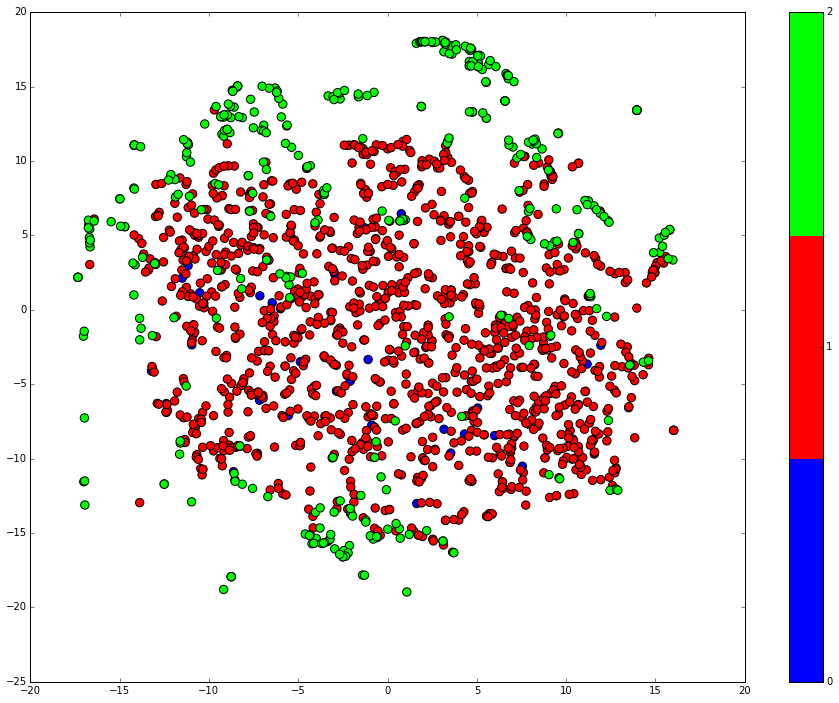

In [199]:
plt.scatter(vis_x, vis_y, c=y_data, cmap = plt.cm.get_cmap("brg", 3), s = 70)
plt.colorbar(ticks=range(3))
#plt.clim(-0.5, 9.5)
plt.show()

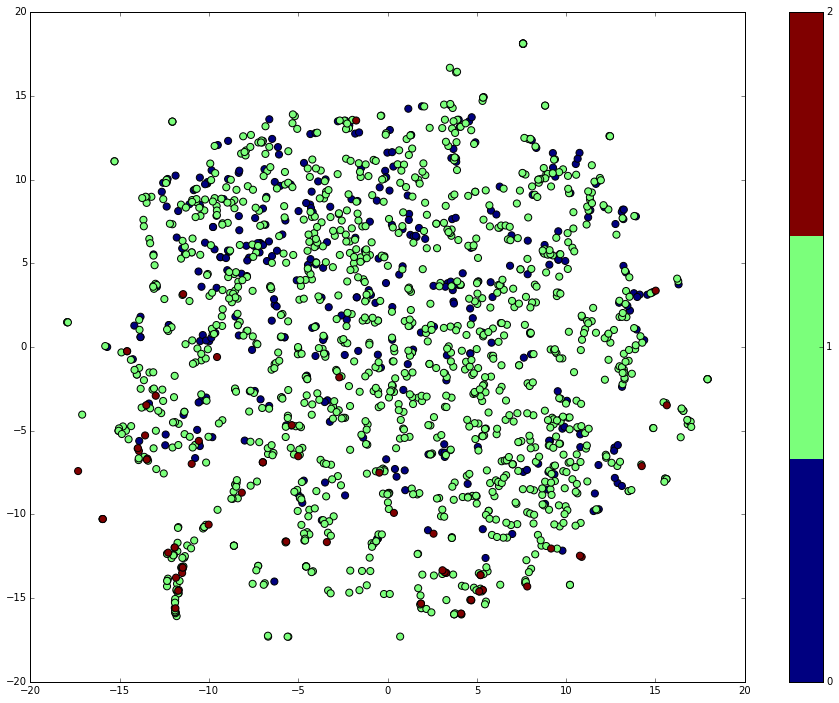

In [190]:
plt.scatter(vis_x, vis_y, c=y_data, cmap = plt.cm.get_cmap("jet", 3), s = 50)
plt.colorbar(ticks=range(3))
#plt.clim(-0.5, 9.5)
plt.show()